## ***Melbourne House Price Pridiction Project***

### Melbourne House Price Prediction using Machine Learning

**Author:** Your Name  
**Dataset:** Melbourne Housing Snapshot (Kaggle)

### Objective
#####Predict house prices in Melbourne using machine learning models and compare
#####Random Forest and XGBoost performance.


## Problem Statement
House prices depend on multiple factors such as location, size, and property type.
The goal of this project is to build a regression model that accurately predicts
house prices based on these features.


## Dataset Description
The dataset contains housing data from Melbourne with features such as:
- Rooms
- Bathroom
- Building Area
- Suburb
- Property Type
- Distance from CBD
- Land Size
- Year Built

**Target variable:** Price


#####Step 1: Importing Neccessary Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#####Step 2: Loading dataset

In [38]:
import kagglehub

path = kagglehub.dataset_download("dansbecker/melbourne-housing-snapshot")

df = pd.read_csv(path + "/melb_data.csv")

df

Using Colab cache for faster access to the 'melbourne-housing-snapshot' dataset.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


#####Step 3: Data Understanding

In [39]:
df.info()
df.describe()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


## Data Preprocessing
Steps performed:
- Selected relevant features
- Handled missing values using median imputation
- Removed extreme outliers using the IQR method
- Log-transformed the target variable to reduce skewness
- Encoded categorical features using One-Hot Encoding

#####Step 4: Data Cleaning

In [40]:
#For missing values in the columns Car, BuildingArea

df['Car'].fillna(df['Car'].median(), inplace=True)
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=True)
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)

#For removing Dulplicate values

df.drop_duplicates(inplace=True)

/tmp/ipython-input-1693952115.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Car'].fillna(df['Car'].median(), inplace=True)
/tmp/ipython-input-1693952115.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [41]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


#####Step 5: Data Transformation

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Scaling landsize using Standard scaler
scaler = StandardScaler()
df['Landsize'] = scaler.fit_transform(df[['Landsize']])

#encoding categorical values into intergers
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])
df['SellerG'] = encoder.fit_transform(df['Method'])
df['Suburb'] = encoder.fit_transform(df['Suburb'])
df['Method'] = encoder.fit_transform(df['Method'])

#For removing extreme values that lead to overfitting

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df['Price'] = df['Price'][(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

df.dropna(inplace=True)

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,85 Turner St,2,0,1480000.0,1,1,3/12/2016,2.5,3067.0,...,1.0,1.0,-0.089316,151.96765,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,0,25 Bloomburg St,2,0,1035000.0,1,1,4/02/2016,2.5,3067.0,...,1.0,0.0,-0.100843,79.00000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,0,5 Charles St,3,0,1465000.0,3,3,4/03/2017,2.5,3067.0,...,2.0,0.0,-0.106356,150.00000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,0,40 Federation La,3,0,850000.0,0,0,4/03/2017,2.5,3067.0,...,2.0,1.0,-0.116380,151.96765,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,0,55a Park St,4,0,1600000.0,4,4,4/06/2016,2.5,3067.0,...,1.0,2.0,-0.109864,142.00000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,305,2/29 Dover Rd,1,2,385000.0,3,3,29/07/2017,6.8,3016.0,...,1.0,1.0,-0.139936,35.64000,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12208,305,87 Pasco St,3,0,1285000.0,1,1,29/07/2017,6.8,3016.0,...,1.0,0.0,-0.065760,151.96765,1970.0,Hobsons Bay,-37.86335,144.89487,Western Metropolitan,6380.0
12209,307,201/152 Peel St,2,2,560000.0,0,0,29/07/2017,4.6,3181.0,...,1.0,1.0,-0.139936,61.60000,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
12210,308,60 Saltlake Bvd,3,0,525300.0,1,1,29/07/2017,25.5,3750.0,...,2.0,2.0,-0.039698,151.96765,1970.0,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0


#####Step 6: Data Reduction

In [43]:
from sklearn.feature_selection import mutual_info_classif
#Feature selection, selecting the most relevant features for the prediction

X = df[['Rooms','Bathroom','BuildingArea','Type','YearBuilt','Suburb','Distance','Landsize']] #
y = df[['Price']]

#Log Tranformation for the y give better flexibility while fitting

y= np.log1p(y)

#####Step 7: Train test split

In [44]:
# Training, Validation and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Models Used
1. Linear Regression (baseline)
2. Random Forest Regressor
3. XGBoost Regressor


Random Forest was used to capture non-linear relationships, while XGBoost was used
for its ability to iteratively correct errors and achieve higher accuracy.


## Evaluation Metrics
The following metrics were used:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score


#####Step 8: Training different models

1.Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

#Since Linear regression only needs 1 independent variable
X_ = X[['Type']]
y_ = y[['Price']]

X__train, X__test, y__train, y__test = train_test_split(X_, y_, test_size=0.25, random_state=42)

In [87]:
#Model Fitting

l_model = LinearRegression()
l_model.fit(X__train,y__train)
y__pred = l_model.predict(X__test)




In [89]:
#Model Evaluation

from sklearn.metrics import root_mean_squared_error,mean_absolute_error

y_test_real = np.expm1(y__test)
y_pred_real = np.expm1(y__pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  400892.43465837324
Mean Absolute Error:  301098.26373021037
R2 Score:  0.22906235698156652


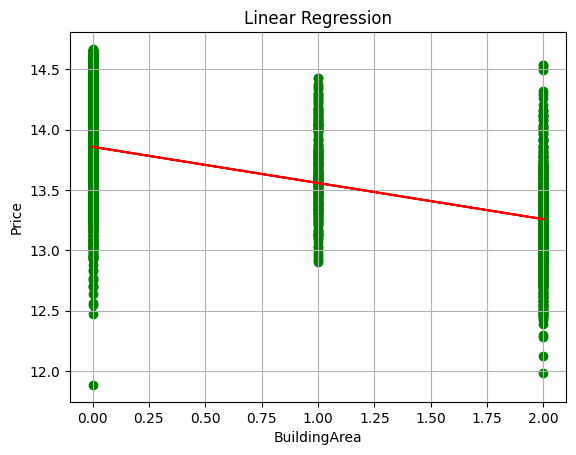

In [90]:
#Model visualization

plt.scatter(X__test,y__test,color='green')
plt.plot(X__test,y__pred,color='red')
plt.grid()
plt.title('Linear Regression')
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.show()

Note:For linear regression the best feature is distance

2.Multiple Linear Regression

In [49]:
#model fitting

l_model.fit(X_train,y_train)

LinearRegression()

In [50]:
#Prediction
my__pred = l_model.predict(X_test)

In [91]:
#Model Evaluation
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(my__pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  355141.55425252265
Mean Absolute Error:  251854.58194178256
R2 Score:  0.4295682410340882


3.Random forest regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

dtr_model = RandomForestRegressor(n_estimators = 600,random_state=42)
dtr_model.fit(X_train,y_train)
rfy__pred = dtr_model.predict(X_test)

y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(rfy__pred)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [53]:
print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  226236.90836199338
Mean Absolute Error:  156453.00665859564
R2 Score:  0.7685124547544224


In [54]:
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dtr_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
3,Type,0.308984
6,Distance,0.182833
5,Suburb,0.121701
7,Landsize,0.118876
0,Rooms,0.097995
2,BuildingArea,0.067601
4,YearBuilt,0.052067
1,Bathroom,0.049943


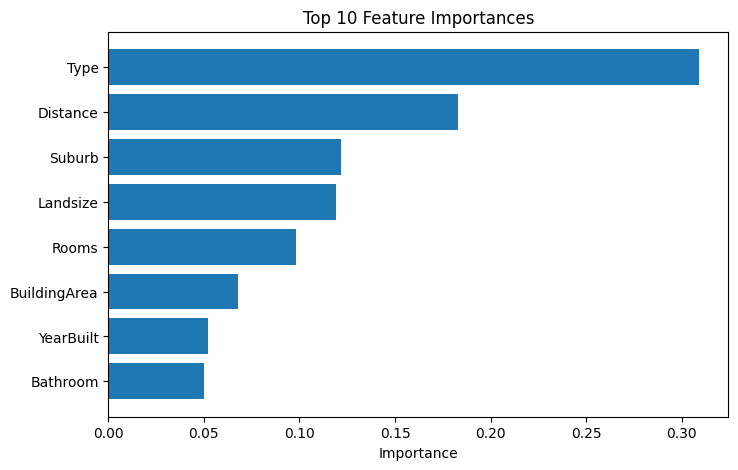

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"][:10], importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define an expanded dictionary called param_distributions
param_distributions = {
    "n_estimators": [1200],
    "max_depth": [30],
    "min_samples_split": [2],
    "min_samples_leaf": [2],
    "max_features": [1.0]
}

# Instantiate a RandomForestRegressor model
rf_random = RandomForestRegressor(random_state=42, n_jobs=-1)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    random_state=42
)




Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Params: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': 30}


In [74]:
best_rf = random_search.best_estimator_

# Fit the RandomizedSearchCV object to the training data
best_rf.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Params:", random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Params: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': 30}


In [75]:
final_rd_pred = best_rf.predict(X_test)

In [76]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(final_rd_pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  226114.87192353388
Mean Absolute Error:  156777.4781928587
R2 Score:  0.7687621248591494


#####Ridge and lasso regression

In [78]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [79]:
ry_pred = ridge.predict(X_test)

In [81]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(ry_pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))


Root Mean Squared Error:  355128.8662805488
Mean Absolute Error:  251853.10410092413
R2 Score:  0.4296089993897161


In [61]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [62]:
ly_pred = lasso.predict(X_test)

In [82]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(ly_pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  347037.1263387554
Mean Absolute Error:  251072.5348142567
R2 Score:  0.45530599932656957


#####XGboost

In [84]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [85]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(xgb_pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  197060.03125
Mean Absolute Error:  135318.828125
R2 Score:  0.8243703842163086


In [94]:
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
3,Type,0.647934
0,Rooms,0.084333
1,Bathroom,0.082278
6,Distance,0.065179
5,Suburb,0.043899
7,Landsize,0.026865
2,BuildingArea,0.025106
4,YearBuilt,0.024406


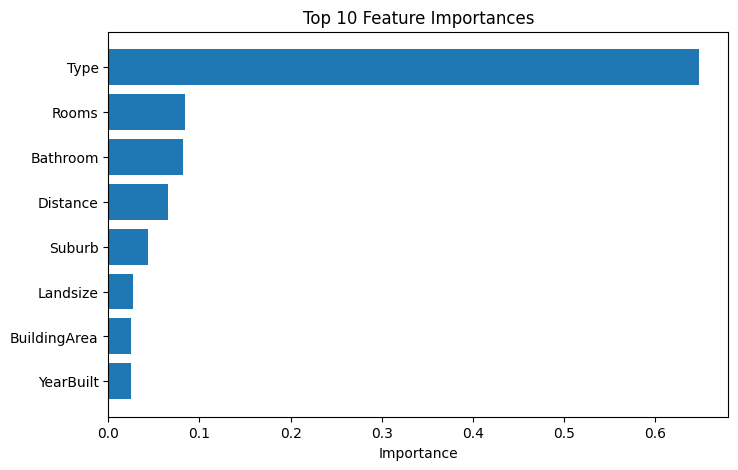

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"][:10], importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()

#####Hyperparameter tuning for XGboost

In [106]:
from xgboost import XGBRegressor

tuned_xgb_model = XGBRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=6,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42,
                         objective="reg:squarederror")
tuned_xgb_model.fit(X_train, y_train)
tuned_xgb_pred = tuned_xgb_model.predict(X_test)

In [107]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(tuned_xgb_pred)

print("Root Mean Squared Error: ",root_mean_squared_error(y_test_real,y_pred_real))
print("Mean Absolute Error: ",mean_absolute_error(y_test_real,y_pred_real))
print("R2 Score: ",r2_score(y_test_real,y_pred_real))

Root Mean Squared Error:  194766.3125
Mean Absolute Error:  134932.84375
R2 Score:  0.8284350633621216


## Results

### Random Forest
- R² ≈ 0.76

### XGBoost (Untuned)
- MAE ≈ 135,000
- RMSE ≈ 195,000
- R² ≈ 0.83


## Conclusion
XGBoost significantly outperformed Random Forest even without hyperparameter tuning.
The model explains over 82% of the variance in house prices, making it suitable
for real-world price estimation tasks.
